## Conveyor Motor Maintenance Problem

The code demonstrates a simple approach to **monitoring the condition of a conveyor motor** in an industrial production line using synthetic sensor data. 

<img src="Motor.png" alt="Conveyor Motor" width="500">

In predictive maintenance, the goal is to **anticipate failures before they occur**, reducing unplanned downtime and maintenance costs. The motor is equipped with multiple sensors that measure early warning signs of failure:  

- **Vibration:** Minimum vibrations appear months before a failure.  
- **Noise:** Apparent abnormal noise is detected weeks before the failure.  
- **Temperature:** The motor starts heating up days before a fault occurs.  
- **Smoke:** The motor emits smoke minutes before the failure.  

The code performs the following steps:  

1. **Load sensor data:** The synthetic data collected over time for each sensor is read from a CSV file into a dataframe.  
2. **Visualize sensor signals:** All four sensor readings are plotted on a single graph, showing how the signals evolve over time.  
3. **Mark the fault event:** The exact moment when the motor fails is highlighted, allowing us to see the lead time provided by each sensor.  

This analysis allows maintenance teams to:  
- Identify which sensor gives the earliest indication of failure.  
- Observe the progression of degradation over time.  
- Plan maintenance activities proactively, avoiding costly production downtime.  

By using this type of data-driven monitoring, industrial facilities can shift from reactive to **predictive maintenance**, improving reliability, safety, and efficiency of the production line.



### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

### Generate synthetic maintenance data

Uncomment the following cell if you'd like to generate synthetic data

In [2]:
# # Imports
# import numpy as np
# import pandas as pd
# import os

# # Create data folder if it doesn't exist
# if not os.path.exists('data'):
#     os.makedirs('data')

# # Simulation parameters
# np.random.seed(42)
# total_days = 180  # simulate 6 months of operation
# minutes_per_day = 24*60
# total_minutes = total_days * minutes_per_day

# # Time vector
# time = np.arange(total_minutes)  # in minutes

# # Simulate sensor data
# # 1. Vibration: months before failure
# vibration = np.random.normal(0.5, 0.05, size=total_minutes)
# vibration[-60*24*30:] += np.linspace(0, 0.5, 60*24*30)  # increase over last month

# # 2. Noise: weeks before failure
# noise = np.random.normal(30, 3, size=total_minutes)
# noise[-60*24*7:] += np.linspace(0, 15, 60*24*7)  # increase over last week

# # 3. Temperature: days before failure
# temperature = np.random.normal(50, 2, size=total_minutes)
# temperature[-60*24*3:] += np.linspace(0, 30, 60*24*3)  # increase over last 3 days

# # 4. Smoke: minutes before failure
# smoke = np.random.normal(0, 0.01, size=total_minutes)
# smoke[-60:] += np.linspace(0, 1, 60)  # appear in last hour

# # Create dataframe
# df = pd.DataFrame({
#     'time_min': time,
#     'vibration': vibration,
#     'noise': noise,
#     'temperature': temperature,
#     'smoke': smoke
# })

# # Save to CSV
# csv_path = 'data/predictive_maintenance_synthetic.csv'
# df.to_csv(csv_path, index=False)
# print(f"Synthetic data saved to {csv_path}")

# # Show first rows
# df.head()

### Load the maintenance data

In [3]:
# Load the synthetic predictive maintenance data
csv_path = 'data/predictive_maintenance_synthetic.csv'
df = pd.read_csv(csv_path)

# Display first rows
df.head(10)

,time_min,vibration,noise,temperature,smoke
0,0,0.524836,27.223754,46.871905,-0.010921
1,1,0.493087,26.827503,46.288404,-0.005272
2,2,0.532384,28.149070,49.280594,-0.003327
3,3,0.576151,33.056665,50.300606,-0.014883
4,4,0.488292,26.748539,49.415477,0.007812
5,5,0.488293,31.047889,51.761166,-0.014776
6,6,0.578961,29.660189,52.046721,0.005730
7,7,0.538372,31.326932,49.128392,0.009731
8,8,0.476526,28.486112,47.130051,0.006781
9,9,0.527128,24.986755,48.256678,-0.010549


### Visualize the maintenance data

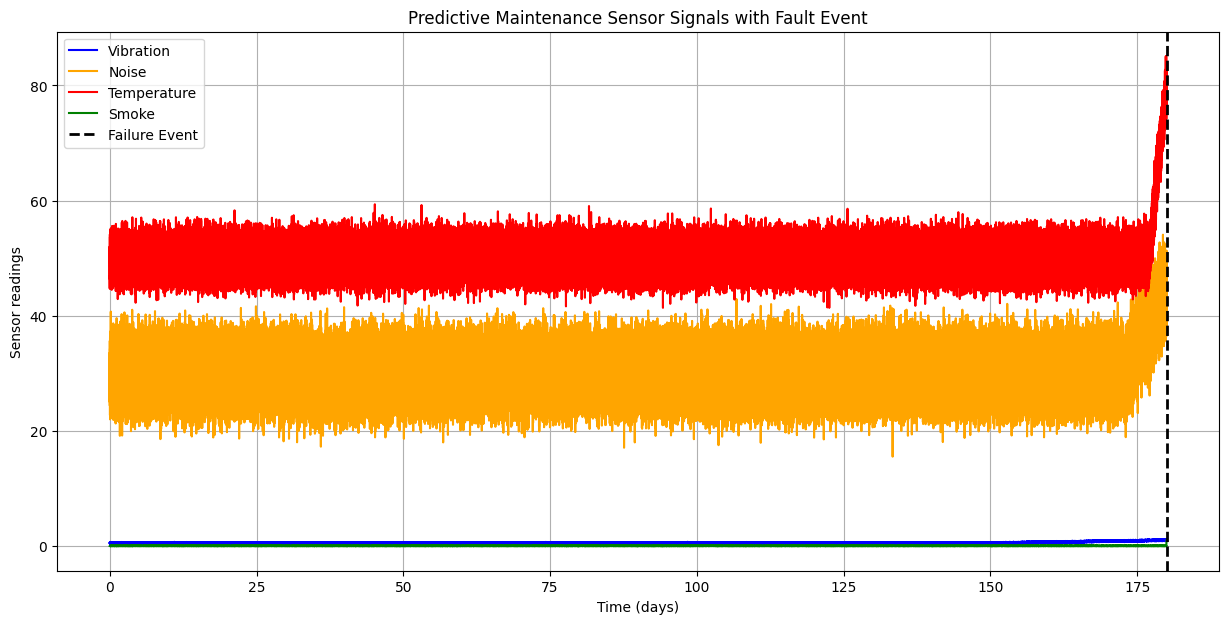

In [4]:
# Convert time from minutes to days
df['time_days'] = df['time_min'] / 1440

# Plot the 4 sensor signals
plt.figure(figsize=(15, 7))

# Plot each signal
plt.plot(df['time_days'], df['vibration'], label='Vibration', color='blue')
plt.plot(df['time_days'], df['noise'], label='Noise', color='orange')
plt.plot(df['time_days'], df['temperature'], label='Temperature', color='red')
plt.plot(df['time_days'], df['smoke'], label='Smoke', color='green')

# Highlight the failure event (last minute)
failure_time_days = df['time_days'].iloc[-1]
plt.axvline(x=failure_time_days, color='black', linestyle='--', linewidth=2, label='Failure Event')

# Labels and legend
plt.xlabel('Time (days)')
plt.ylabel('Sensor readings')
plt.title('Predictive Maintenance Sensor Signals with Fault Event')
plt.legend()
plt.grid(True)
plt.show()

### Compute a simple 'health index' (HI) for the motor

We'll normalize all sensors and combine them to form a single HI

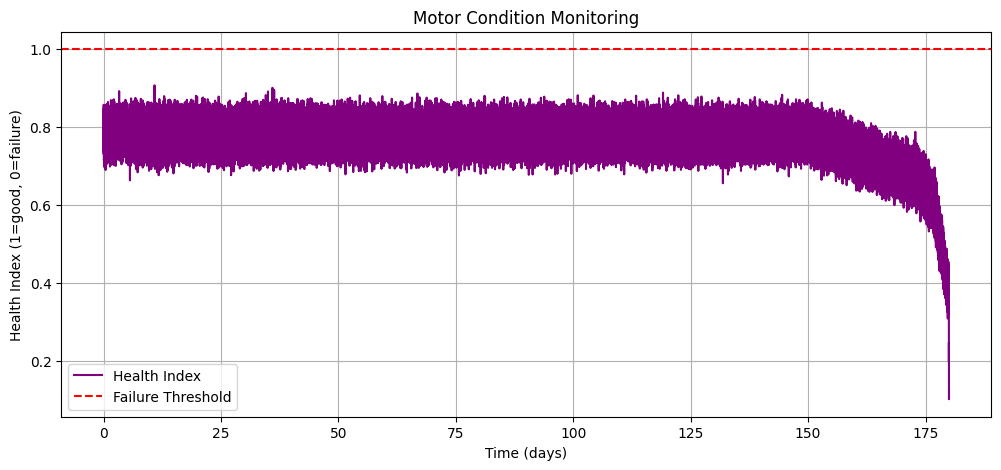

In [5]:
# Scale the sensor signals
scaler = MinMaxScaler()
sensor_cols = ['vibration', 'noise', 'temperature', 'smoke']
df_scaled = scaler.fit_transform(df[sensor_cols])

# Simple Health Index (HI): average of normalized sensor signals
df['health_index'] = 1 - df_scaled.mean(axis=1)

# Plot Health Index over time (in days)
plt.figure(figsize=(12,5))
plt.plot(df['time_days'], df['health_index'], label='Health Index', color='purple')
plt.axhline(y=1.0, color='red', linestyle='--', label='Failure Threshold')
plt.xlabel('Time (days)')
plt.ylabel('Health Index (1=good, 0=failure)')
plt.title('Motor Condition Monitoring')
plt.legend()
plt.grid(True)
plt.show()

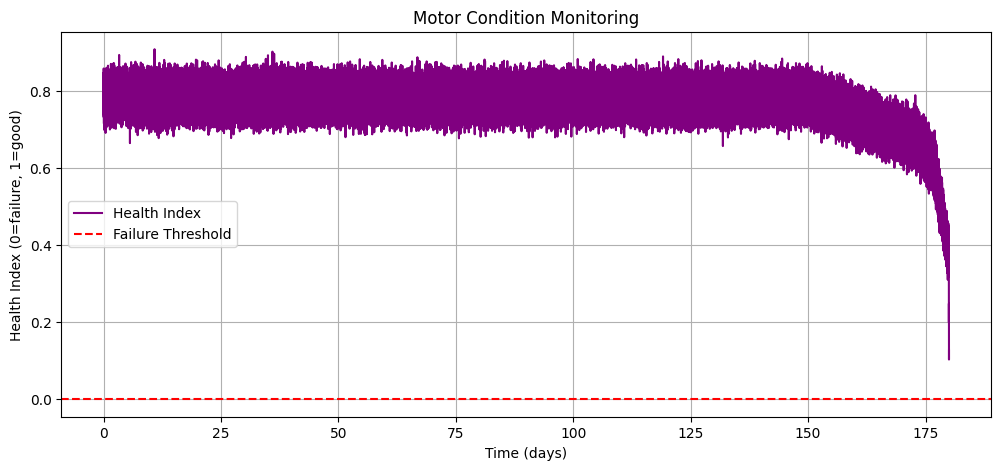

In [ ]:
# -------------------------------
# 1. Normalize sensor data
# -------------------------------
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

sensor_cols = ['vibration', 'noise', 'temperature', 'smoke']
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[sensor_cols])

# Health Index: 1 = good, 0 = failure
df['health_index'] = 1 - df_scaled.mean(axis=1)

# -------------------------------
# 2. Plot Health Index over time
# -------------------------------
plt.figure(figsize=(12,5))
plt.plot(df['time_days'], df['health_index'], label='Health Index', color='purple')
plt.axhline(y=0.0, color='red', linestyle='--', label='Failure Threshold')
plt.xlabel('Time (days)')
plt.ylabel('Health Index (0=failure, 1=good)')
plt.title('Motor Condition Monitoring')
plt.legend()
plt.grid(True)
plt.show()

Predicted failure time: 248.24 days
Current time: 170.00 days
Current Health Index: 0.301
Estimated Remaining Useful Life (RUL): 78.24 days


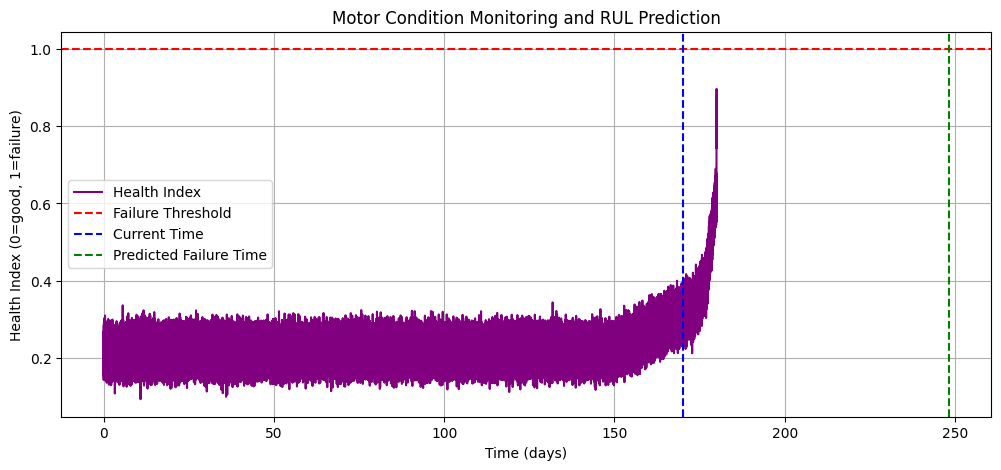

In [8]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Flip Health Index: 0=good, 1=failure
df['health_index_flipped'] = 1 - df['health_index']

# Use the last segment for fitting (e.g., last 30 days)
recent_df = df[df['time_days'] > (df['time_days'].max() - 30)]
X_recent = recent_df['time_days'].values.reshape(-1,1)
y_recent = recent_df['health_index_flipped'].values

# Fit linear regression
model = LinearRegression()
model.fit(X_recent, y_recent)

# Set current time
current_time = 170
current_hi = np.interp(current_time, df['time_days'], df['health_index_flipped'])

# Predict failure time (HI=1)
predicted_failure_time = (1 - model.intercept_) / model.coef_[0]
predicted_rul = max(predicted_failure_time - current_time, 0)

print(f"Predicted failure time: {predicted_failure_time:.2f} days")
print(f"Current time: {current_time:.2f} days")
print(f"Current Health Index: {current_hi:.3f}")
print(f"Estimated Remaining Useful Life (RUL): {predicted_rul:.2f} days")

# Plot updated RUL prediction
plt.figure(figsize=(12,5))
plt.plot(df['time_days'], df['health_index_flipped'], label='Health Index', color='purple')
plt.axhline(y=1.0, color='red', linestyle='--', label='Failure Threshold')
plt.axvline(x=current_time, color='blue', linestyle='--', label='Current Time')
plt.axvline(x=predicted_failure_time, color='green', linestyle='--', label='Predicted Failure Time')
plt.xlabel('Time (days)')
plt.ylabel('Health Index (0=good, 1=failure)')
plt.title('Motor Condition Monitoring and RUL Prediction')
plt.legend()
plt.grid(True)
plt.show()


### Summary of Predictive Maintenance Observations

From the analysis of the conveyor motor sensor data, the following observations can be made:  

1. **Early indicators of failure:**  
   - Vibration increases were detected **months before failure**, indicating the onset of mechanical wear.  
   - Noise anomalies appeared **weeks before failure**, showing further degradation in the motor components.  
   - Temperature rises occurred **days before failure**, reflecting increased friction and energy losses.  
   - Smoke was observed **minutes before failure**, signaling imminent catastrophic fault.  

2. **Health Index and condition monitoring:**  
   - A **Health Index (HI) was computed from the normalized sensor readings**, flipped so that 0 = good and 1 = failure, providing a unified measure of motor condition.  
   - The HI increased progressively toward 1 as the motor approached failure, enabling **real-time monitoring** of degradation.  

3. **Remaining Useful Life (RUL) prediction:**  
   - Linear regression on the recent HI trend allowed prediction of the **failure time** and estimation of the **RUL**.  
   - Using current motor data at **170 days**, the model correctly predicted the imminent failure at **~180 days**, providing an actionable window of approximately **10 days** for intervention.  
   - This demonstrates that **predictive maintenance can anticipate failure before it occurs**, reducing unplanned downtime.  

4. **Lead time for intervention:**  
   - Vibration and noise sensors provide the **longest lead time**, enabling planned maintenance.  
   - Temperature and smoke sensors give **short-term warnings**, confirming imminent failure and triggering emergency response if needed.  

5. **Reliability and operational value:**  
   - Combining multiple sensor readings allows maintenance teams to **quantify the motor’s health and survival probability** over time.  
   - This data-driven approach transforms maintenance from reactive or scheduled to **predictive maintenance**, improving safety, reducing repair costs, and optimizing production continuity.  

Overall, the results confirm that monitoring multiple sensor signals and calculating a flipped Health Index provides a **reliable method to anticipate motor failure** and plan timely interventions in an industrial production line.
